## JSON to CSV

In [ ]:
import json
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'

In [ ]:
def jsontodf(dir):
  # files: 디렉토리 안의 파일 목록의 리스트
  files = [f for f in listdir(dir) if isfile(join(dir, f))]

  # json_files: 파일 목록 DataFrame
  json_files = pd.DataFrame({"file_id" : files})

  # json file 목록을 읽으며
  # 각 파일의 json 형태로 저장된 txt 파일을 DataFrame으로 형변환 한 후
  # concat를 통해 전체 데이터프레임 형성
  df_list = []
  for i in range(len(json_files)-1):
      with open(dir+json_files['file_id'][i], encoding = 'utf-8') as f:
          df = pd.DataFrame(json.loads(line) for line in f)
      df_list.append(df)
  dfs = pd.concat(df_list)

  return dfs

### log

In [ ]:
log = jsontodf('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/')

"\nfor i in range(5):\n    with open('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_click_stream/'+json_files['file_id'][i+1], encoding = 'utf-8') as f:\n        tmp = pd.DataFrame(json.loads(line) for line in f)\n    log = pd.concat([log, tmp])\n"

In [ ]:
log.head()

,request_date_time,account_id,device_type,product_id,before_product_id
0,2020-03-14 10:39:45,101496,M,88429694,0
1,2020-03-24 15:33:35,101496,M,64694842,0
2,2019-12-31 09:54:33,101496,M,81503945,0
3,2019-12-31 09:52:14,101496,M,84434768,0
4,2019-12-31 09:52:25,101496,M,81503945,0


In [ ]:
log.shape

(24105214, 5)

In [ ]:
log.to_csv(path + 'log.csv', encoding = 'utf-8-sig')

### Accounts

In [ ]:
accounts = jsontodf('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_accounts/')

In [ ]:
accounts.head()

,account_id,gender,age,zip_code,address,last_login_dts
0,100986,M,43.0,16512,경기도 수원시 영통구 하동 994 광교호수마을참누리레이크,1.586492e+12
1,102793,F,40.0,706-022,대구 수성구 만촌2동,1.586596e+12
2,102960,F,57.0,626-860,경남 양산시 하북면,1.575587e+12
3,105153,F,38.0,NaN,부산시 금정구 서2동,1.589554e+12
4,106535,F,45.0,06232,서울 강남구 역삼동,1.578967e+12


In [ ]:
accounts.shape

(1741578, 6)

In [ ]:
accounts.to_csv(path + 'accounts.csv', encoding = 'utf-8-sig')

### Products

In [ ]:
products = jsontodf('/content/drive/Shared drives/YES24/2020-06-10/m3/all_products/')

In [ ]:
products.head()

,product_id,product_name,category_id,published_at,shop_price,maker_name
0,43528701,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,001007,20170225,31000.00,생명의말씀사
1,43528730,바이오메디컬 엔지니어를 위한 생체 신호 측정 실습,001020,20170626,20000.00,계명대학교출판부
2,43528779,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,001007,20170225,31000.00,생명의말씀사
3,43528822,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,001007,20170225,31000.00,생명의말씀사
4,43528824,황종희가 꿈꾸는 도덕정치,001009,20170625,20000.00,서울대학교출판문화원


In [ ]:
products.shape

(1745066, 6)

In [ ]:
products.to_csv(path + 'products.csv', encoding = 'utf-8-sig')

###Orders

In [ ]:
orders = jsontodf('/content/drive/Shared drives/YES24/2020-06-10/m3/m3_orders/')

In [ ]:
orders.head()

,order_id,account_id,product_id,price,created_at
0,218519157,100777,84936431,10800.0,1585273295643
1,221364615,100777,23116461,6300.0,1588498287633
2,218519157,100777,86641767,14850.0,1585273295643
3,223489288,100777,6315392,10800.0,1591161710237
4,218519157,100777,85010480,43200.0,1585273295643


In [ ]:
orders.shape

(8382514, 5)

In [ ]:
orders.to_csv(path + 'orders.csv', encoding = 'utf-8-sig')

# 전처리

In [ ]:
import pandas as pd
import os
path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'
import numpy as np

from datetime import datetime
import datetime
from dateutil.parser import parse
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

## Accounts

In [ ]:
accounts = pd.read_csv('/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/accounts.csv')
accounts.drop('Unnamed: 0', axis=1, inplace=True)
accounts.dropna(inplace=True)

#### accounts: 최근 접속 일자 변환

In [ ]:
accounts['last_login_dts'] = pd.to_datetime(accounts['last_login_dts']*1000000)
accounts.dropna(inplace=True)

In [ ]:
accounts.head()

,account_id,gender,age,zip_code,address,last_login_dts
0,100986,M,43.0,16512,경기도 수원시 영통구 하동 994 광교호수마을참누리레이크,2020-04-10 04:06:03
1,102793,F,40.0,706-022,대구 수성구 만촌2동,2020-04-11 09:10:04
2,102960,F,57.0,626-860,경남 양산시 하북면,2019-12-05 23:02:47
4,106535,F,45.0,06232,서울 강남구 역삼동,2020-01-14 01:51:32
5,106783,F,40.0,07555,서울특별시 강서구 염창동 264-27 삼성한아름아파트,2020-04-21 07:04:51


#### accounts: gender 변환

In [ ]:
accounts.gender.unique()

array(['M', 'F', '-', '0'], dtype=object)

In [ ]:
accounts['gender'].replace(to_replace = '-', value = np.nan, inplace = True)
accounts['gender'].replace(to_replace = '0', value = np.nan, inplace = True)
accounts.dropna(inplace=True)
accounts['gender'] = pd.DataFrame(encoder.fit_transform(accounts['gender']))

In [ ]:
accounts.dropna(inplace=True)
accounts['gender'].unique()

array([1., 0.])

#### accounts: age 결측처리

In [ ]:
accounts.age.unique()

array([ 43.,  40.,  57.,  45.,  52.,  49.,  48.,  46.,  47.,  42.,  41.,
        37.,  35.,  66.,  56.,  44.,  50.,  51.,  34.,  58.,  72.,  59.,
        53.,  36.,  74.,  54.,  55.,  61.,  39.,  63.,  38.,  32.,  69.,
        65.,  64.,  30.,  60.,  62.,  75.,  31.,  33.,  29.,  67.,  17.,
        73.,  28.,  26.,  27.,  24.,  77.,  68.,  70.,  25.,  79.,  76.,
        23.,  85.,  21.,  18.,  20.,  22.,  12.,  19.,  14.,  71.,  11.,
        15., 100.,  16.,  81.,  13.,  -1.,  86.,  10.,  80.,   8.,   9.,
        83.,  78.,  94.,  82.,  90.,  95.,  88.,   4.,  87.,  89.,  84.,
        91.,  93.,  92.,  96.,  98.,  99.,   6.,   5.,  97.,   7.,   2.,
         3.])

In [ ]:
accounts['age'].replace(to_replace = -1, value = np.nan, inplace = True) # 결측값 = -1
accounts['age'] = accounts['age'].apply(lambda x : np.nan if x <=7 else x) # 7세 이하는 결측처리

In [ ]:
accounts.dropna(inplace=True)
accounts['age'].isnull().sum()

0

#### accounts: 주소

In [ ]:
accounts['address'][0].split(' ')[0]

'경기도'

In [ ]:
# 수도권만 1, 나머지 0으로 설정
accounts['address_is'] = accounts['address'].apply(lambda x: 0 if '경기' in x.split(' ')[0] else 1  if '인천' in x.split(' ')[0] else 1 if '서울' in x.split(' ')[0] else 1)

In [ ]:
accounts.dropna(inplace=True)
accounts['address_is'].isnull().sum()

0

#### 저장

In [ ]:
path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'

In [ ]:
accounts = accounts[['account_id','gender','age','address','address_is','last_login']]
accounts.to_csv(path + 'accounts_preprocessed.csv',encoding='utf-8')

## Orders

### orders: java시간 변환

In [ ]:
orders = pd.read_csv(path+'orders.csv')
orders.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
orders['created_at'][0]

Timestamp('2020-03-27 01:41:36.286000')

In [ ]:
def invert_javatime(javatime):
  seconds = javatime / 1000
  sub_seconds = (javatime % 1000.0) / 1000.0
  date = datetime.datetime.fromtimestamp(seconds + sub_seconds)
  return date

In [ ]:
java_timestamp = 1589424016190
invert_javatime(java_timestamp)

datetime.datetime(2020, 5, 14, 2, 40, 16, 380000)

In [ ]:
orders['created_at'] = orders['created_at'].apply(lambda x : invert_javatime(x))
orders

,order_id,account_id,product_id,price,created_at
0,218519157,100777,84936431,10800.0,2020-03-27 01:41:36.286
1,221364615,100777,23116461,6300.0,2020-05-03 09:31:28.266
2,218519157,100777,86641767,14850.0,2020-03-27 01:41:36.286
3,223489288,100777,6315392,10800.0,2020-06-03 05:21:50.474
4,218519157,100777,85010480,43200.0,2020-03-27 01:41:36.286
...,...,...,...,...,...
8382509,223843200,16987547,3799797,9000.0,2020-06-08 14:50:52.854
8382510,223850682,16988206,73776838,18000.0,2020-06-08 22:09:55.166
8382511,223871729,16989204,90496918,66600.0,2020-06-09 04:48:23.986
8382512,223887913,16990132,7217755,12600.0,2020-06-09 09:12:26.054


### 저장

In [ ]:
orders.to_csv(path+'orders_preprocessed.csv',encoding='utf-8')

## Products

In [ ]:
products = pd.read_csv(path+'products.csv',dtype={'published_at':str})
products.drop('Unnamed: 0', axis=1, inplace=True)
products.dropna(inplace=True)

In [ ]:
products

,product_id,product_name,category_id,published_at,shop_price,maker_name
0,43528701,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,1007,20170225,31000.0,생명의말씀사
1,43528730,바이오메디컬 엔지니어를 위한 생체 신호 측정 실습,1020,20170626,20000.0,계명대학교출판부
2,43528779,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,1007,20170225,31000.0,생명의말씀사
3,43528822,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,1007,20170225,31000.0,생명의말씀사
4,43528824,황종희가 꿈꾸는 도덕정치,1009,20170625,20000.0,서울대학교출판문화원
...,...,...,...,...,...,...
1745061,85352665,2020 임성래의 쉽게 쓴 품질경영기사 필기,1001,20200106,39000.0,성안당
1745062,85353942,파고다 HSK 5급 종합서 최신 개정판,1011,20200102,22000.0,PAGODA Books
1745063,85354052,2020 고시넷 2주완성 사회조사분석사 2급 필기,1001,20200110,23000.0,고시넷
1745064,85354327,이시원의 영어 대모험 1 : 인칭대명사,1027,20200108,12000.0,아울북


### products: 출판일 전처리(date형식)

In [ ]:
products['published_at'] = products['published_at'].apply(lambda x : x[0:8] if type(x) == 'str' else x)
products['published_at'] = products['published_at'].apply(lambda x : x.strip())
products['published_at'] = products['published_at'].apply(lambda x : '20991231' if len(x) <8 else x)
products['published_at'] = products['published_at'].astype(str)
products['published_at'] = products['published_at'].apply(lambda x : '20991231' if int(x[4:6]) >= 13 else x )
products['published_at'] = products['published_at'].apply(lambda x : '20991231' if int(x) <= 19000000 else x)

In [ ]:
products['published_at'] = products['published_at'].apply(lambda x : parse(x) )

In [ ]:
products

,product_id,product_name,category_id,published_at,shop_price,maker_name
0,43528701,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,007,2017-02-25 00:00:00,31000.0,생명의말씀사
1,43528730,바이오메디컬 엔지니어를 위한 생체 신호 측정 실습,020,2017-06-26 00:00:00,20000.0,계명대학교출판부
2,43528779,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,007,2017-02-25 00:00:00,31000.0,생명의말씀사
3,43528822,Slim 베스트 굿데이 성경 (개역개정4판/새찬송가합본/지퍼식/주석(단색)/반달색인...,007,2017-02-25 00:00:00,31000.0,생명의말씀사
4,43528824,황종희가 꿈꾸는 도덕정치,009,2017-06-25 00:00:00,20000.0,서울대학교출판문화원
...,...,...,...,...,...,...
1745061,85352665,2020 임성래의 쉽게 쓴 품질경영기사 필기,001,2020-01-06 00:00:00,39000.0,성안당
1745062,85353942,파고다 HSK 5급 종합서 최신 개정판,011,2020-01-02 00:00:00,22000.0,PAGODA Books
1745063,85354052,2020 고시넷 2주완성 사회조사분석사 2급 필기,001,2020-01-10 00:00:00,23000.0,고시넷
1745064,85354327,이시원의 영어 대모험 1 : 인칭대명사,027,2020-01-08 00:00:00,12000.0,아울북


### products: 카테고리ID 전처리

In [ ]:
products['category_id'] = products['category_id'].apply(lambda x : str(x)[1:])

In [ ]:
products.isnull().sum()

product_id      0
product_name    0
category_id     0
published_at    0
shop_price      0
maker_name      0
dtype: int64

In [ ]:
products.to_csv(path+'products_preprocessed.csv',encoding='utf-8')

### products: 가격대 이산화

## click

In [ ]:
click = pd.read_csv(path+'log.csv')
click.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
print(click.shape)
click.head()

(30113602, 5)


,request_date_time,account_id,device_type,product_id,before_product_id
0,2020-03-14 10:39:45,101496,M,88429694,0
1,2020-03-24 15:33:35,101496,M,64694842,0
2,2019-12-31 09:54:33,101496,M,81503945,0
3,2019-12-31 09:52:14,101496,M,84434768,0
4,2019-12-31 09:52:25,101496,M,81503945,0


### click: device_type 원핫인코딩

In [ ]:
click['device_type'] = pd.DataFrame(encoder.fit_transform(click['device_type']))

In [ ]:
click.isnull().sum()

request_date_time    0
account_id           0
device_type          0
product_id           0
before_product_id    0
dtype: int64

In [ ]:
click.to_csv(path+'click.csv',encoding='utf-8')

## click & orders

### click & orders: orders 중 click없이 구매한 데이터(외부 사이트 이용) 삭제하기
* click 데이터 크기가 방대하여 절반만 사용한 관계로 더 적어짐

In [ ]:
orders = pd.read_csv(path+'orders_preprocessed.csv',encoding='utf-8')

In [ ]:
order_check_account = click['account_id'].unique().tolist()
order_check_product = click['product_id'].unique().tolist()

In [ ]:
orders.shape

(8382514, 6)

In [ ]:
order_check_1 = orders[orders['product_id'].isin(order_check_product)]

In [ ]:
order_check_1.shape

(8344774, 6)

In [ ]:
order_check_2 = order_check_1[order_check_1['account_id'].isin(order_check_account)]

In [ ]:
order_check_2.shape

(4035057, 6)

In [ ]:
order_check_2 = order_check_2.iloc[:,1:]

In [ ]:
order_check_2.to_csv(path+'orders_only_in_clicks.csv',encoding='utf-8')

## Feature Engineering

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import os
path = '/content/drive/Shared drives/YES24/YES24 정리폴더/0. 전처리/'
import numpy as np

from datetime import datetime
import datetime
from dateutil.parser import parse
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

### 신구 선호도_orders 3,4/5

#### products: 2020년에 출판된 도서는 모두 예전 도서로 취급

In [ ]:
products = pd.read_csv(path+'products_preprocessed.csv',dtype={'category_id':str})
products.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
products['published_at'] = products['published_at'].apply(lambda x: str(x))
products['pub_newold'] = products['published_at'].apply(lambda x: 1 if x[0:4] == '2020' else 0)

In [ ]:
products.dropna(inplace=True)
products.isnull().sum()

product_id      0
product_name    0
category_id     0
published_at    0
shop_price      0
maker_name      0
pub_newold      0
dtype: int64

#### orders: 4월 30일 기준으로 train/test 분할

In [ ]:
orders = pd.read_csv(path+'orders_only_in_clicks.csv')
orders.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
orders['created_at']= orders['created_at'].astype('datetime64[ns]')

In [ ]:
train_date = datetime.date(2020, 4, 30)
orders['train'] = orders['created_at'].apply(lambda x: np.nan if x.date() > train_date else x)

In [ ]:
orders_train = orders.dropna()
orders_train

,order_id,account_id,product_id,price,created_at,train
1,217109953,104533,234373,18000.00,2020-03-11 13:59:53.880,2020-03-11 13:59:53.880
2,220523812,106728,38972963,12600.00,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880
3,220523812,106728,69645132,9000.00,2020-04-21 08:15:15.880,2020-04-21 08:15:15.880
4,216465952,106728,8157957,13320.00,2020-03-04 09:19:32.886,2020-03-04 09:19:32.886
5,216465952,106728,57920512,9900.00,2020-03-04 09:19:32.886,2020-03-04 09:19:32.886
...,...,...,...,...,...,...
4034973,221116360,16830266,78696213,15750.00,2020-04-29 05:49:28.040,2020-04-29 05:49:28.040
4034974,221164923,16834484,90047753,4500.00,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086
4034975,221164923,16834484,24262537,7920.00,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086
4034976,221164923,16834484,43830706,8400.00,2020-04-30 02:05:54.086,2020-04-30 02:05:54.086


#### product + order (train)

In [ ]:
orders_products_train = pd.merge(orders_train, products, on='product_id',how='left')

In [ ]:
print(orders_products_train.isnull().sum())
orders_products_train.dropna(inplace=True)

order_id           0
account_id         0
product_id         0
price              0
created_at         0
train              0
product_name    1144
category_id     1144
published_at    1144
shop_price      1144
maker_name      1144
pub_newold      1144
dtype: int64


#### preference: mean을 통해 신구선호도 집계, 1에 가까울 수록 신규도서 선호 (train)

In [ ]:
preference = pd.DataFrame(orders_products_train.groupby('account_id')['pub_newold'].agg('mean'))
preference.reset_index(inplace=True)
preference.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

#### product + order + preference (train)

In [ ]:
orders_preference_train = pd.merge(orders_train, preference, on='account_id', how='left')

In [ ]:
orders['test'] = orders['created_at'].apply(lambda x: np.nan if x.date() < train_date else x)

#### product + order (test)

In [ ]:
orders_test = orders.drop('train',axis=1)
orders_test.dropna(inplace=True)

In [ ]:
orders_products_test = pd.merge(orders_test, products, on='product_id',how='left')

In [ ]:
print(orders_products_test.isnull().sum())
orders_products_test.dropna(inplace=True)

order_id          0
account_id        0
product_id        0
price             0
created_at        0
test              0
product_name    592
category_id     592
published_at    592
shop_price      592
maker_name      592
pub_newold      592
dtype: int64


#### preference: mean을 통해 신구선호도 집계, 1에 가까울 수록 신규도서 선호 (test)

In [ ]:
preference_test = pd.DataFrame(orders_products_test.groupby('account_id')['pub_newold'].agg('mean'))
preference_test.reset_index(inplace=True)
preference_test.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

#### product + order + preference (test)

In [ ]:
orders_preference_test = pd.merge(orders_test, preference_test, on='account_id', how='left')

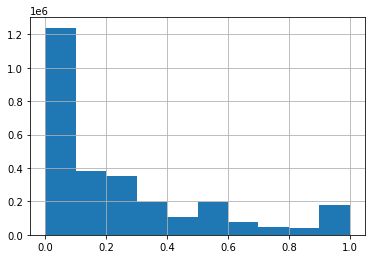

In [ ]:
orders_preference_train.new_preference.hist()

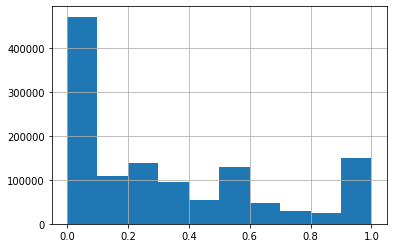

In [ ]:
orders_preference_test.new_preference.hist()

#### preference: 0.5 기준으로 0, 1로 바꿈

In [ ]:
orders_preference_train['new_pref'] = orders_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
orders_preference_test['new_pref'] = orders_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
orders_preference_train['new_pref'] = orders_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
orders_preference_test['new_pref'] = orders_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
orders_preference_train.to_csv(path+'orders_preference_train.csv',encoding='utf-8')
orders_preference_test.to_csv(path+'orders_preference_test.csv',encoding='utf-8')

### 신구 선호도_click 3,4 / 5

#### click: 3월 1일 ~ 4월 30일, 그리고 3월 1일 이전 데이터(train) / 5월 1일 이후 데이터 (test)

In [ ]:
click = pd.read_csv(path+'click.csv')
click.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
click['request_date_time'] = click['request_date_time'].astype('datetime64[ns]')

In [ ]:
start = datetime.date(2020, 3, 1)
train = datetime.date(2020, 5, 1)

In [ ]:
click['train'] = click['request_date_time'].apply(lambda x: np.nan if x.date() < start else x )
click.dropna(inplace=True)

In [ ]:
click['train'] = click['request_date_time'].apply(lambda x: np.nan if x.date() >= train else x )
click['test'] = click['request_date_time'].apply(lambda x: np.nan if x.date() < train else x )

In [ ]:
click_train = click.drop('test', axis=1)
click_train.dropna(inplace=True)

In [ ]:
click_test = click.drop('train',axis=1)
click_test.dropna(inplace=True)

#### click + product (train, test)

In [ ]:
click_product_train = pd.merge(click_train,products,on='product_id',how='left')
click_product_train.dropna(inplace=True)

In [ ]:
click_product_test = pd.merge(click_test,products,on='product_id',how='left')
click_product_test.dropna(inplace=True)

#### preference: mean을 통해 신규선호도 집계, 1에 가까울수록 신규도서 선호 (train, test)

In [ ]:
preference_train = pd.DataFrame(click_product_train.groupby('account_id')['pub_newold'].agg('mean'))
preference_train.reset_index(inplace=True)
preference_train.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

In [ ]:
preference_test = pd.DataFrame(click_product_test.groupby('account_id')['pub_newold'].agg('mean'))
preference_test.reset_index(inplace=True)
preference_test.rename(columns = {'pub_newold':'new_preference'}, inplace=True)

#### product + click + preference (train, test)

In [ ]:
click_preference_train = pd.merge(click_product_train,preference_train, on='account_id',how='left')

In [ ]:
click_preference_test = pd.merge(click_product_test,preference_test, on='account_id',how='left')

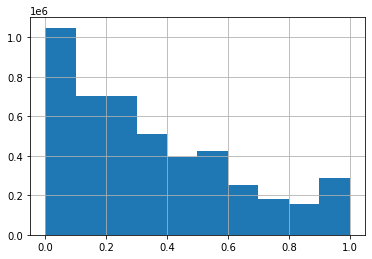

In [ ]:
click_preference_test.new_preference.hist()

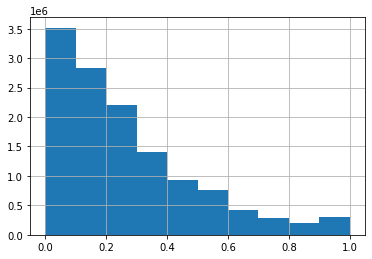

In [ ]:
click_preference_train.new_preference.hist()

#### preference: 0.5 기준 0,1 로 바꿈

In [ ]:
click_preference_train['new_pref'] = click_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
click_preference_test['new_pref'] = click_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
click_preference_train['new_pref'] = click_preference_train['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)
click_preference_test['new_pref'] = click_preference_test['new_preference'].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
click_preference_train.to_csv(path+'click_preference_train.csv',encoding='utf-8')
click_preference_test.to_csv(path+'click_preference_test.csv',encoding='utf-8')

### 카테고리 선호도

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
users = pd.read_csv('./accounts_context_0624.csv',encoding='utf-8')
clicks = pd.read_csv('./clicks_day_time_weekday_0624.csv',encoding='utf-8')
books = pd.read_csv('./product_dums_with_publish&price.csv',encoding='utf-8')

In [ ]:
clicks_temp = clicks[['account_id','product_id']]

In [ ]:
clicks_1 = clicks_temp.iloc[:20088683]
clicks_2 = clicks_temp.iloc[20088683:40177057]
clicks_3 = clicks_temp.iloc[40177057:]

In [ ]:
books_temp = books.iloc[:,[2,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]

In [ ]:
pre_1 = clicks_1.merge(books_temp,how='left')
grouped_1 = pre_1.groupby('account_id')
pre_cat_1 = grouped_1.sum().iloc[:,1:]
pre_cat_1.to_csv('./pre_cat_1.csv')
pre_2 = clicks_2.merge(books_temp,how='left')
grouped_2 = pre_2.groupby('account_id')
pre_cat_2 = grouped_2.sum().iloc[:,1:]
pre_cat_2.to_csv('./pre_cat_2.csv')
pre_3 = clicks_3.merge(books_temp,how='left')
grouped_3 = pre_3.groupby('account_id')
pre_cat_3 = grouped_3.sum().iloc[:,1:]
pre_cat_3.to_csv('./pre_cat_3.csv')

In [ ]:
pre_cat_1 = pd.read_csv('./pre_cat_1.csv',encoding='utf-8')
pre_cat_2 = pd.read_csv('./pre_cat_2.csv',encoding='utf-8')
pre_cat_3 = pd.read_csv('./pre_cat_3.csv',encoding='utf-8')

In [ ]:
pre_cat_total = pd.concat([pre_cat_1,pre_cat_2,pre_cat_3])
pre_cat_total['max_cat'] = pre_cat_total.iloc[:,1:].max(axis=1)
pre_cat_total['max_cat_name'] = pre_cat_total.iloc[:,1:26].idxmax(axis=1)

In [ ]:
pre_cat_total

,account_id,cat__1.0,cat__2.0,cat__3.0,cat__4.0,cat__5.0,cat__7.0,cat__8.0,cat__9.0,cat__10.0,...,cat__20.0,cat__22.0,cat__23.0,cat__25.0,cat__27.0,cat__29.0,cat__33.0,cat__34.0,max_cat,max_cat_name
0,100001,0.0,1.0,233.0,5.0,2.0,0.0,4.0,8.0,7.0,...,5.0,13.0,18.0,0.0,4.0,0.0,18.0,44.0,233.0,cat__3.0
1,100004,1.0,0.0,17.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,0.0,7.0,2.0,17.0,cat__3.0
2,100014,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,1.0,1.0,14.0,cat__29.0
3,100018,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,cat__2.0
4,100020,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,7.0,cat__19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594107,16960408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,cat__13.0
1594108,16960413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,cat__34.0
1594109,16960422,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,cat__1.0
1594110,16960424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,cat__10.0


In [ ]:
pre_cat_total.sort_values(by='max_cat')

,account_id,cat__1.0,cat__2.0,cat__3.0,cat__4.0,cat__5.0,cat__7.0,cat__8.0,cat__9.0,cat__10.0,...,cat__20.0,cat__22.0,cat__23.0,cat__25.0,cat__27.0,cat__29.0,cat__33.0,cat__34.0,max_cat,max_cat_name
1569239,16829000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat__1.0
549452,4871926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat__1.0
1584223,16905256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat__1.0
1347357,14654854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat__1.0
33776,327491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat__1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379326,15149303,12.0,1.0,584.0,0.0,0.0,0.0,3831.0,3.0,0.0,...,1.0,2.0,0.0,0.0,16.0,12.0,198.0,4.0,3831.0,cat__8.0
693795,6237562,1.0,0.0,17.0,0.0,18.0,0.0,11.0,5.0,0.0,...,3.0,8.0,1.0,0.0,55.0,29.0,3956.0,43.0,3956.0,cat__33.0
1128327,11442039,0.0,1.0,2.0,0.0,549.0,12.0,2.0,10.0,3.0,...,3.0,4.0,7.0,45.0,4157.0,119.0,17.0,9.0,4157.0,cat__27.0
471329,4148490,133.0,0.0,2.0,2.0,52.0,1.0,0.0,102.0,0.0,...,4.0,4186.0,11.0,6.0,4.0,0.0,21.0,132.0,4186.0,cat__22.0


In [ ]:
pre_cat_total.to_csv('./user_cat_preferences_0624.csv')

In [ ]:
new_users = users.merge(pre_cat_total,how='left')

In [ ]:
new_users.to_csv('./accounts_context_add_prefer_0624.csv')

### 활동시간

In [ ]:
path = '/content/drive/Shared drives/YES24/2020-06-10/m3/'
users = pd.read_csv(path+'(나이)accounts_age_0623.csv',encoding='utf-8')

In [ ]:
clicks = pd.read_csv('./clicks_day_time_0623.csv',encoding='utf-8')
clicks['time'] = clicks['request_date_time'].str.slice(start=11, stop=13)
clicks['day'] = clicks['request_date_time'].str.slice(start=0,stop=11)

In [ ]:
orders = pd.read_csv('./orders_preprocessed_0623.csv',encoding='utf-8')

In [ ]:
books = pd.read_csv('./pro_preprocessed_0623.csv',encoding='utf-8')

In [ ]:
clicks_1 = clicks.iloc[:20088683]
clicks_2 = clicks.iloc[20088683:40177057]
clicks_3 = clicks.iloc[40177057:]

#### 활동시간대

In [ ]:
clicks_1['click_time'] = clicks_1['time'].apply(lambda x:'day' if x in list(range(6,19)) else 'night')
clicks_2['click_time'] = clicks_2['time'].apply(lambda x:'day' if x in list(range(6,19)) else 'night')
clicks_3['click_time'] = clicks_3['time'].apply(lambda x:'day' if x in list(range(6,19)) else 'night')

In [ ]:
clicks_1[['day','night']]=pd.get_dummies(clicks_1.click_time)
clicks_2[['day','night']]=pd.get_dummies(clicks_2.click_time)
clicks_3[['day','night']]=pd.get_dummies(clicks_3.click_time)

In [ ]:
grouped_1 = clicks_1.groupby('account_id')
grouped_2 = clicks_2.groupby('account_id')
grouped_3 = clicks_3.groupby('account_id')

In [ ]:
acc_times_1 = grouped_1.sum().iloc[:,[4,5]]
acc_times_2 = grouped_2.sum().iloc[:,[4,5]]
acc_times_3 = grouped_3.sum().iloc[:,[4,5]]

In [ ]:
acc_times = pd.concat([acc_times_1,acc_times_2,acc_times_3])

In [ ]:
acc_times.to_csv('./only_activity_times_0623.csv')

In [ ]:
acc_times.reset_index(inplace=True)

In [ ]:
new_users = users.merge(acc_times,how='left')

In [ ]:
new_users.to_csv('./accounts_age_times_0623.csv')

#### 활동 요일

In [ ]:
users = pd.read_csv('./accounts_age_times_0623.csv',encoding='utf-8')

In [ ]:
clicks = pd.read_csv('./clicks_day_time_0623.csv',encoding='utf-8')
clicks = clicks.sort_values(by=['account_id','Unnamed: 0'])

In [ ]:
clicks['date_time'] = pd.to_datetime(clicks.day)
clicks['week_day'] = clicks['date_time'].dt.weekday_name

In [ ]:
clicks.to_csv('./clicks_day_time_weekday_0624.csv')

#### 활동 주말 vs 평일

In [ ]:
users = pd.read_csv('./accounts_age_times_0623.csv',encoding='utf-8')

In [ ]:
clicks = pd.read_csv('./clicks_day_time_weekday_0624.csv',encoding='utf-8')

In [ ]:
clicks_a = clicks.iloc[:20088683]
clicks_b = clicks.iloc[20088683:40177057]
clicks_c = clicks.iloc[40177057:]

In [ ]:
clicks_a['weekend'] = clicks_a['week_day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0)
clicks_b['weekend'] = clicks_b['week_day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0)
clicks_c['weekend'] = clicks_c['week_day'].apply(lambda x: 1 if x in ['Sunday','Saturday'] else 0)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
clicks_a['weekday'] = clicks_a['week_day'].apply(lambda x: 0 if x in ['Sunday','Saturday'] else 1)
clicks_b['weekday'] = clicks_b['week_day'].apply(lambda x: 0 if x in ['Sunday','Saturday'] else 1)
clicks_c['weekday'] = clicks_c['week_day'].apply(lambda x: 0 if x in ['Sunday','Saturday'] else 1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
grouped_a = clicks_a.groupby('account_id')
grouped_b = clicks_b.groupby('account_id')
grouped_c = clicks_c.groupby('account_id')

In [ ]:
acc_weekend_a = grouped_a.sum().iloc[:,[5,6]]
acc_weekend_b = grouped_b.sum().iloc[:,[5,6]]
acc_weekend_c = grouped_c.sum().iloc[:,[5,6]]

In [ ]:
acc_weekends = pd.concat([acc_weekend_a,acc_weekend_b,acc_weekend_c])

In [ ]:
acc_weekends.to_csv('./only_activity_weekends_0624.csv')

In [ ]:
acc_weekends.reset_index(inplace=True)

In [ ]:
new_users = users.merge(acc_weekends,how='left')

In [ ]:
new_users.to_csv('./accounts_age_times_weekdays_0624.csv')

#### 활동 시간 비율

In [ ]:
new_users = pd.read_csv('./accounts_age_times_weekdays_0624.csv',encoding='utf-8')

In [ ]:
new_users['tmp'] = new_users['day'] + new_users['night']
new_users['day_ratio'] = new_users['day']/new_users['tmp']
new_users['night_ratio'] = 1 - new_users['day_ratio']
new_users.drop('tmp',axis=1,inplace=True)

In [ ]:
new_users['total'] = new_users['weekend'] + new_users['weekday']
new_users['weekend_ratio'] = new_users['weekend']/new_users['total']
new_users['weekday_ratio'] = 1 - new_users['weekend_ratio']

In [ ]:
new_users.to_csv('./accounts_semi_final_0624.csv')

### 관여도

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
users = pd.read_csv('./accounts_semi_final_0624.csv',encoding='utf-8')

In [ ]:
clicks = pd.read_csv('./clicks_day_time_weekday_0624.csv',encoding='utf-8')

In [ ]:
orders = pd.read_csv('./orders_preprocessed_0623.csv',encoding='utf-8')

In [ ]:
clicks_1 = clicks.iloc[:20088683]
clicks_2 = clicks.iloc[20088683:40177057]
clicks_3 = clicks.iloc[40177057:]

In [ ]:
grouped_1 = clicks_1.groupby('account_id')
grouped_2 = clicks_2.groupby('account_id')
grouped_3 = clicks_3.groupby('account_id')

In [ ]:
acc_clicks_1 = grouped_1.count().iloc[:,1]
acc_clicks_2 = grouped_2.count().iloc[:,1]
acc_clicks_3 = grouped_3.count().iloc[:,1]

#### click

In [ ]:
acc_clicks = pd.concat([acc_clicks_1,acc_clicks_2,acc_clicks_3])

In [ ]:
acc_clicks=pd.DataFrame(acc_clicks)

In [ ]:
acc_clicks.to_csv('./only_clicks_0624.csv')

In [ ]:
acc_clicks.reset_index(inplace=True)

In [ ]:
acc_clicks.columns = ['account_id','click_counts']

In [ ]:
new_users = users.merge(acc_clicks,how='left')

In [ ]:
new_users.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
new_users.drop('Unnamed: 0.1',axis=1,inplace=True)

In [ ]:
new_users.to_csv('./accounts_click_counts_0624.csv')

#### order

In [ ]:
grouped_o = orders.groupby('account_id')

In [ ]:
acc_orders = grouped_o.count().iloc[:,1]

In [ ]:
acc_orders = pd.DataFrame(acc_orders)

In [ ]:
acc_orders.reset_index(inplace=True)

In [ ]:
acc_orders.columns = ['account_id','order_counts']

In [ ]:
users = pd.read_csv('./accounts_click_counts_0624.csv',encoding='utf-8')

In [ ]:
new_new_users = new_users.merge(acc_orders,how='left')

In [ ]:
new_new_users.to_csv('./accounts_click_order_counts_0624.csv')

In [ ]:
new_new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts,order_counts
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0,5
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0,2
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0,2
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0,1
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


#### 관여도 (클릭수 / 주문수)

In [ ]:
new_new_users['involvement'] = new_new_users['click_counts'] / new_new_users['order_counts']

#### 관여도 정규화

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

In [ ]:
temp = users[['account_id','involvement']].copy()
temp[:] = scaler.fit_transform(temp[:])
temp.columns = ['xx','involement_normalized']

In [ ]:
temp

,xx,involement_normalized
0,0.006038,0.000457
1,0.006086,0.001345
2,0.006194,0.004305
3,0.006419,0.001480
4,0.006428,0.000303
...,...,...
1670270,0.999533,NaN
1670271,0.999543,NaN
1670272,0.999554,NaN
1670273,0.999554,NaN


In [ ]:
new_new_users['normalized_involvement'] = temp.involement_normalized

In [ ]:
new_new_users.to_csv('./accounts_context_0624.csv')

In [ ]:
aa = pd.read_csv('./accounts_context_0624.csv',encoding='utf-8')

In [ ]:
aa.isnull().sum()

Unnamed: 0                     0
account_id                     0
gender                         0
age                            0
g_age                          0
address                        0
address_is                     0
last_login                     0
day                       138731
night                     138731
weekend                   138731
weekday                   138731
day_ratio                 138731
night_ratio               138731
total                     138731
weekend_ratio             138731
weekday_ratio             138731
click_counts              138731
order_counts                   0
involvement               138731
normalized_involvement    138731
dtype: int64

#### 활동시간 더미

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
users = pd.read_csv('./accounts_context_0624.csv',encoding='utf-8')

In [ ]:
users.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
new_users = users.dropna()

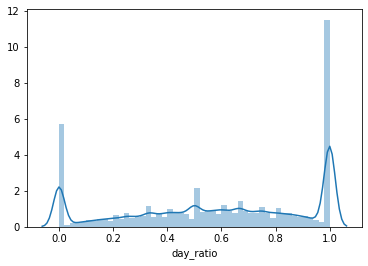

In [ ]:
sns.distplot(new_users.day_ratio)

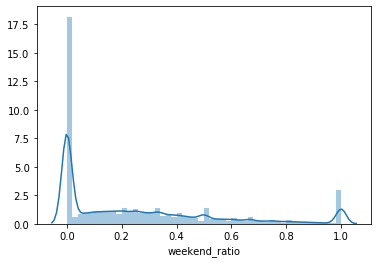

In [ ]:
sns.distplot(new_users.weekend_ratio)

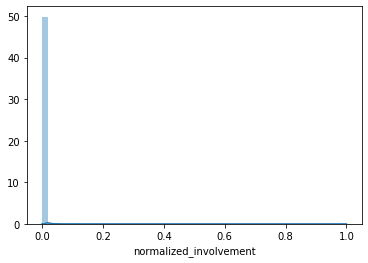

In [ ]:
sns.distplot(new_users.normalized_involvement)

In [ ]:
new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts,order_counts,involvement,normalized_involvement
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0,5,3.40,0.000455
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0,2,10.00,0.001343
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0,2,32.00,0.004302
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0,1,11.00,0.001478
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0,4,2.25,0.000301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670224,16955274,0.0,28.0,2.0,서울특별시 서초구 서초동 1364-21,1,2020-05-30 06:37:44,2.0,0.0,2.0,0.0,1.000000,0.000000,2.0,1.000000,0.000000,2.0,2,1.00,0.000132
1670225,16957084,1.0,31.0,3.0,서울특별시 광진구 광장동 554-7 광장현대아파트,1,2020-05-30 16:26:39,0.0,2.0,2.0,0.0,0.000000,1.000000,2.0,1.000000,0.000000,2.0,1,2.00,0.000267
1670226,16957506,0.0,51.0,5.0,경상북도 경산시 계양동 74-1 남부자동차학원,1,2020-05-31 00:21:15,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1,1.00,0.000132
1670227,16959433,1.0,42.0,3.0,부산광역시 사상구 학장동 167-3 학장대림아파트,1,2020-05-31 11:02:01,0.0,2.0,2.0,0.0,0.000000,1.000000,2.0,1.000000,0.000000,2.0,1,2.00,0.000267


In [ ]:
new_users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,weekday,day_ratio,night_ratio,total,weekend_ratio,weekday_ratio,click_counts,order_counts,involvement,normalized_involvement
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,15.0,0.647059,0.352941,17.0,0.117647,0.882353,17.0,5,3.40,0.000455
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,20.0,0.850000,0.150000,20.0,0.000000,1.000000,20.0,2,10.00,0.001343
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,51.0,0.687500,0.312500,64.0,0.203125,0.796875,64.0,2,32.00,0.004302
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,11.0,0.000000,1.000000,11.0,0.000000,1.000000,11.0,1,11.00,0.001478
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,5.0,0.222222,0.777778,9.0,0.444444,0.555556,9.0,4,2.25,0.000301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670224,16955274,0.0,28.0,2.0,서울특별시 서초구 서초동 1364-21,1,2020-05-30 06:37:44,2.0,0.0,2.0,0.0,1.000000,0.000000,2.0,1.000000,0.000000,2.0,2,1.00,0.000132
1670225,16957084,1.0,31.0,3.0,서울특별시 광진구 광장동 554-7 광장현대아파트,1,2020-05-30 16:26:39,0.0,2.0,2.0,0.0,0.000000,1.000000,2.0,1.000000,0.000000,2.0,1,2.00,0.000267
1670226,16957506,0.0,51.0,5.0,경상북도 경산시 계양동 74-1 남부자동차학원,1,2020-05-31 00:21:15,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1,1.00,0.000132
1670227,16959433,1.0,42.0,3.0,부산광역시 사상구 학장동 167-3 학장대림아파트,1,2020-05-31 11:02:01,0.0,2.0,2.0,0.0,0.000000,1.000000,2.0,1.000000,0.000000,2.0,1,2.00,0.000267


In [ ]:
users['dayday'] = users['day_ratio'].apply(lambda x:1 if x >0.6 else 0)

In [ ]:
users['nightnight'] = users['day_ratio'].apply(lambda x:1 if x<0.4 else 0)

In [ ]:
users['balance'] = users['dayday'] + users['nightnight']

In [ ]:
users['balance'] = users['balance'].apply(lambda x:0 if x == 1 else 1)

In [ ]:
users['weekdayday'] = users['weekend_ratio'].apply(lambda x:1 if x<0.5 else 0)

In [ ]:
users['weekendend'] = users['weekend_ratio'].apply(lambda x:1 if x > 0.5 else 0)

In [ ]:
users

,account_id,gender,age,g_age,address,address_is,last_login,day,night,weekend,...,weekday_ratio,click_counts,order_counts,involvement,normalized_involvement,dayday,nightnight,balance,weekdayday,weekendend
0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,2.0,...,0.882353,17.0,5,3.40,0.000455,1,0,0,1,0
1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,0.0,...,1.000000,20.0,2,10.00,0.001343,1,0,0,1,0
2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,13.0,...,0.796875,64.0,2,32.00,0.004302,1,0,0,1,0
3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,0.0,...,1.000000,11.0,1,11.00,0.001478,0,1,0,1,0
4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,4.0,...,0.555556,9.0,4,2.25,0.000301,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,0,0,1,0,0
1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,0,0,1,0,0
1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,0,0,1,0,0
1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,0,0,1,0,0


In [ ]:
users.to_csv('./accounts_context_0624.csv')

In [ ]:
users.nightnight.value_counts()

0    1217760
1     452515
Name: nightnight, dtype: int64

In [ ]:
pd.read_csv('./accounts_context_0624.csv')

,Unnamed: 0,account_id,gender,age,g_age,address,address_is,last_login,day,night,...,weekday_ratio,click_counts,order_counts,involvement,normalized_involvement,dayday,nightnight,balance,weekdayday,weekendend
0,0,102600,0.0,50.0,4.0,경상북도 포항시 남구 지곡동 효자그린1차아파트,1,2020-06-09 10:54:54,11.0,6.0,...,0.882353,17.0,5,3.40,0.000455,1,0,0,1,0
1,1,103417,0.0,40.0,3.0,경기 부천시 원미 심곡동,0,2020-05-12 14:57:49,17.0,3.0,...,1.000000,20.0,2,10.00,0.001343,1,0,0,1,0
2,2,105247,1.0,59.0,5.0,광주광역시 북구 일곡동 816-3 동아아파트,1,2020-01-20 05:09:15,44.0,20.0,...,0.796875,64.0,2,32.00,0.004302,1,0,0,1,0
3,3,109061,0.0,59.0,5.0,강원 동해시 천곡동 센트로빌아파트,1,2020-03-13 10:16:41,0.0,11.0,...,1.000000,11.0,1,11.00,0.001478,0,1,0,1,0
4,4,109217,0.0,46.0,4.0,경기 수원시 영통구 영통1동 황골마을1단지아파트,0,2020-03-09 11:32:04,2.0,7.0,...,0.555556,9.0,4,2.25,0.000301,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670270,1670270,16983289,1.0,48.0,4.0,경기도 안성시 공도읍 용두리 753 산수화아파트,0,2020-06-07 17:03:35,NaN,NaN,...,NaN,NaN,1,NaN,NaN,0,0,1,0,0
1670271,1670271,16983447,1.0,32.0,3.0,인천광역시 미추홀구 도화동 1008 e편한세상도화6-2단지,1,2020-06-07 20:09:03,NaN,NaN,...,NaN,NaN,5,NaN,NaN,0,0,1,0,0
1670272,1670272,16983639,0.0,32.0,3.0,충청남도 당진시 석문면 통정리 65-3,1,2020-06-08 00:10:53,NaN,NaN,...,NaN,NaN,1,NaN,NaN,0,0,1,0,0
1670273,1670273,16983644,1.0,16.0,1.0,경기도 시흥시 정왕동 2483 시흥배곧에스케이뷰,0,2020-06-09 00:07:42,NaN,NaN,...,NaN,NaN,2,NaN,NaN,0,0,1,0,0


### bestseller

In [ ]:
#필요 데이터 load
pro = pd.read_csv('pro_preprocessed_0623.csv')
pro.drop(columns=pro.columns[0],inplace=True)

order = pd.read_csv('orders_preprocessed.csv')
order.drop(columns=order.columns[0], inplace=True)



In [ ]:
#order, product 데이터 merge
pro_pre = pro[['category_id','product_id']]
best = pd.merge(order, pro_pre, on='product_id', how='left')
best.isnull().sum()
best.dropna(inplace=True)

In [ ]:
#created_at(주문일) count하여 특정 카테고리 내 특정 도서 구매량 비교
best2 = pd.DataFrame(best.groupby(['category_id','product_id']).count()['created_at']).sort_values('created_at', ascending=False)



In [ ]:
#주문량이 가장 많은 순대로 200권 선정(리스트)
best200_nocat = best2.sort_values(['created_at'],ascending=False)[0:200].reset_index()['product_id'].tolist()



In [ ]:
#카테고리별 주문량 높은 순대로 24권 선정(리스트)
best3 = best2.sort_values(['category_id','created_at'],ascending=False)
category_no = np.arange(0,35).tolist()
best24_cat = []
for no in category_no:
    best24_cat.append(best3.reset_index()[best3.reset_index()['category_id']==no][0:24]['product_id'].tolist())
best24_cat_fin = [y for x in best24_cat for y in x]

In [ ]:
#best 200권 데이터프레임
pro['best200'] = pro['product_id'].apply(lambda x: 1 if x in best200_nocat else 0 )
pro[pro['best200']==1]



In [ ]:
#카테고리별 best 24권 데이터프레임
pro['bestcat24'] = pro['product_id'].apply(lambda x: 1 if x in best24_cat_fin else 0 )
pro[pro['bestcat24']==1]

## Kmeans

In [ ]:
#kmeans library / visualization library import
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler

path = '/content/drive/Shared drives/YES24/2020-06-10/m3/'

In [ ]:
#파일로드
#book data load
book = pd.read_csv(path+'book_feature_product_label.csv')

In [ ]:
#user data load
user = pd.read_csv(path+'(나이)accounts_age_0623.csv')
user.drop(columns=user.columns[0], inplace=True)
#user 나이 group별로 dummify
dummies = pd.get_dummies(user['g_age'], prefix='age')
user_new = pd.concat([user, dummies], axis=1)

In [ ]:
#click data load
click = pd.read_csv(path+'clicks_refined_train_0625.csv')
click.drop(columns=click.columns[0], inplace = True)
click_user = pd.merge(click, user, on='account_id', how='left')

### book k-means

In [ ]:
#product별 많이 구매하는 연령대 aggregation을 통해서 구하기
user_age = click_user.groupby(['product_id']).mean()[['g_age']].reset_index()
#aggregation을 통해 나온 소수점 정수로 바꾸기(반올림을 통해서)
user_age['g_age'] = user_age['g_age'].apply(lambda x: round(x, 0))
user_age.dropna(inplace=True)

#product별 많이 구매하는 연령대 최종 데이터프레임 merge를 통해 생성
book_new = pd.merge(book, user_age, on='product_id',how='right')
book_new.dropna(inplace=True)
book_feature = book_new[['category_id','published','book_price','g_age']]

In [ ]:
book_feature

In [ ]:
#book feature scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(book_feature)
book_feature = scaler.fit_transform(book_feature)

NameError: ignored

In [ ]:
#적절한 cluster 개수 정하기

model_books = KMeans()
visualizer = KElbowVisualizer(model_books, k=(1, 20))
visualizer.fit(book_feature)

In [ ]:
#앞에 나온 cluster로 kmeans
model_books = KMeans(n_clusters =5, algorithm = 'auto')
model_books.fit(book_feature)
predict = pd.DataFrame(model_books.predict(book_feature))
predict.columns = ['book_feature']``

In [ ]:
#clustering 결과 확인
predict['book_feature'].value_counts()
predict

In [ ]:
#clustering 변수 book dataframe에 merge
book_fin = pd.concat([book_new, predict], axis=1)
book_fin.rename(columns={'book_feature':'cluster'},inplace=True)

In [ ]:
#책 cluster 별 특성 aggregation
book_fin.groupby(['cluster']).mean() #평균
book_fin.groupby(['cluster']).agg(lambda x: stats.mode(x)[0][0]) #최빈값


In [ ]:
#dummify할 변수 목록
dummy_list= ['category_id','published','book_price','best200','bestcat24']
#dummify
book_new = pd.DataFrame()
book_new = book_new.append(book_fin['product_id']).T

for col in dummy_list:
	book_new = pd.concat([book_new, pd.get_dummies(book_fin[col], prefix=col)], axis=1)

In [ ]:
#aggregation하기 전 전처리
book_new = pd.concat([book_new, book_fin['cluster']], axis=1)
dummy_1 = [col for col in book_new.columns if col[-3:]!='0.0'][1:-1]
dummy_0 = [col for col in book_new.columns if col[-3:]=='0.0'][1:-1]
dummy_col = dummy_1 + dummy_0

book_new[dummy_col] = book_new[dummy_col].replace({0:np.nan})
book_new.replace({1.0 : int(1)}, inplace=True)

#전체 product 갯수 세기
book_new['product_id'].count()

In [ ]:
#aggregation을 통해 cluster별 변수특성 만들기
cluster_feat = book_new.groupby(['cluster']).agg(lambda x : x.count() / len(x))
book_new.groupby(['cluster']).agg(lambda x:x.count())

### user k-means

In [ ]:
users = pd.read_csv('users_kmeans.csv')
users['most_pref'] = users.apply(lambda row: str(users['most_pref']), axis = 1)
users_scale = users.iloc[:, 1:]

users_col = [col for col in users.columns if users[col].dtype == 'float64']
users_scale = users[users_col]



In [ ]:
#scaling

scaler =MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(users_scale)
users_features = scaler.fit_transform(users_scale)

In [ ]:
#K-means cluster 개수
from yellowbrick.cluster import KElbowVisualizer

model_users = Kmeans()
visualizer = KElbowVisualizer(model_users, k=(1,20))
visualizer.fit(users_features)

### clustered data aggregation

In [ ]:
#데이터 로드
#book clustering data load
bookcluster = pd.read_csv('book_feature_clustering.csv')
bookcluster.drop(columns=bookcluster.columns[0], inplace=True)

#user clustering data load
user = pd.read_csv('user_features_clustered_0625.csv')

#click data load
click = pd.read_csv('clicks_refined_train_0625.csv')

In [ ]:
#user data dummify
user_fin = pd.DataFrame()
user_fin = user_fin.append(user_new['account_id']).T
for col in dummify_col:
	user_fin = pd.concat([user_fin, pd.get_dummies(user_new[col], prefix = col)], axis =1)
user_fin.to_csv('user_dummified_1df_0628.csv', index=False)

In [ ]:
#user, book 클러스터링 데이터 click data와 merge
#click + bookcluster merge
click_bookcluster = pd.merge(click, bookcluster, on = 'product_id', how='left')
click_bookcluster.drop(columns = click_bookcluster.columns[0], inplace =True)
click_bookcluster.dropna(inplace=True)
click_bookcluster.to_csv('click_bookcluster_0628.csv', index = False)


In [ ]:
#쓸 변수만 선택
click_bookcluster = click_bookcluster[['account_id','product_id','day','category_id','cluster']]

In [ ]:
#너무 커서 2개로 나눔
cb1 = click_bookcluster[:12861166]
cb2 = click_bookcluster[12861166:]

In [ ]:
#click + user cluster + book cluster
h1 = pd.merge(cb1, user_fin, on = 'account_id', how='left')
h2 = pd.merge(cb2, user_fin, on = 'account_id', how='left')

h1.dropna(inplace = True)
h2.dropna(inplace = True)

h1.to_csv('hope1_dropna.csv', index = False)
h2.to_csv('hope2_dropna.csv', index = False)

In [ ]:
#사용할 변수만 선택
love1_ed = love1[['cluster', 'gender_0.0', 'gender_1.0', 'g_age_0.0', 'g_age_1.0', 'g_age_2.0',
       'g_age_3.0', 'g_age_4.0', 'g_age_5.0', 'g_age_6.0', 'most_pref_1.0',
       'most_pref_2.0', 'most_pref_3.0', 'most_pref_4.0', 'most_pref_5.0',
       'most_pref_7.0', 'most_pref_8.0', 'most_pref_9.0', 'most_pref_10.0',
       'most_pref_11.0', 'most_pref_12.0', 'most_pref_13.0', 'most_pref_14.0',
       'most_pref_15.0', 'most_pref_16.0', 'most_pref_17.0', 'most_pref_19.0',
       'most_pref_20.0', 'most_pref_22.0', 'most_pref_23.0', 'most_pref_25.0',
       'most_pref_27.0', 'most_pref_29.0', 'most_pref_33.0', 'most_pref_34.0',
       'new_pref_0', 'new_pref_1', 'address_is_0', 'address_is_1']]

love2_ed = love2[['cluster', 'gender_0.0', 'gender_1.0', 'g_age_0.0', 'g_age_1.0', 'g_age_2.0',
       'g_age_3.0', 'g_age_4.0', 'g_age_5.0', 'g_age_6.0', 'most_pref_1.0',
       'most_pref_2.0', 'most_pref_3.0', 'most_pref_4.0', 'most_pref_5.0',
       'most_pref_7.0', 'most_pref_8.0', 'most_pref_9.0', 'most_pref_10.0',
       'most_pref_11.0', 'most_pref_12.0', 'most_pref_13.0', 'most_pref_14.0',
       'most_pref_15.0', 'most_pref_16.0', 'most_pref_17.0', 'most_pref_19.0',
       'most_pref_20.0', 'most_pref_22.0', 'most_pref_23.0', 'most_pref_25.0',
       'most_pref_27.0', 'most_pref_29.0', 'most_pref_33.0', 'most_pref_34.0',
       'new_pref_0', 'new_pref_1', 'address_is_0', 'address_is_1']]

In [ ]:
#cluster column
cluster = love1_ed.iloc[:,:1]

In [ ]:
#두개합치기	
love_ed = love1_ed.iloc[:,1:].add(love2_ed.iloc[:,1:])

In [ ]:
#cluster, 나머지 변수 합치기
love_ed_fffff = pd.merge(cluster, love_ed, left_index = True, right_index = True)

In [ ]:
#각 변수 분리
gender = love_ed_fffff.iloc[:,1:3]
g_age = love_ed_fffff.iloc[:,3:10]
most_pref = love_ed_fffff.iloc[:,10:35]
new_pref = love_ed_fffff.iloc[:,35:37]
address = love_ed_fffff.iloc[:,37:]

In [ ]:
#p(product)
newp1 = pd.read_csv('newp1.csv', nrows=12000000)
newp2 = pd.read_csv('newp2.csv', nrows=12000000)

h1 = pd.read_csv('hope1_dropna.csv',nrows=12000000)
h2 = pd.read_csv('hope2_dropna.csv',nrows=12000000)

h1_new = h1.iloc[:,5:]
h2_new = h2.iloc[:,5:]

#cluster column 붙이기
h1_new = pd.concat([h1['cluster'],h1_new],axis=1)
h2_new = pd.concat([h2['cluster'],h2_new],axis=1)

In [ ]:
#h(user) : cluster별 변수 특성 나타내기 위해 1) aggregation(sum)
h1_sum = h1_new.groupby('cluster').agg(lambda x:sum(x))
h2_sum = h2_new.groupby('cluster').agg(lambda x:sum(x))

#두개합치기
h_sum = h1_sum.add(h2_sum)

#h(user) : cluster별 변수 특성 나타내기 위해 2)aggregation(count)
h1_count = h1_new.groupby('cluster').agg(lambda x :x.count())
h2_count = h2_new.groupby('cluster').agg(lambda x :x.count())

#두개합치기
h_count = h1_count.add(h2_count)

#h(user) : cluster별 변수 특성 나타내기 위해 3) sum / count (mean)
h_fin = h_sum / h_count

h_fin.to_csv('wonjinbabo_0628.csv',index=False)

In [ ]:
p1_new = p1.iloc[:, 3:]
p2_new = p2.iloc[:, 3:]

#p(product) : cluster별 변수 특성 나타내기 위해 1) aggregation(sum)
p1_sum = p1_new.groupby('label').agg(lambda x:sum(x))
p2_sum = p2_new.groupby('label').agg(lambda x:sum(x))

#두개 합치기
p_sum = p1_sum.add(p2_sum)

#p(product) : cluster별 변수 특성 나타내기 위해 2)aggregation(count)
p1_count = p1_new.groupby('label').agg(lambda x :x.count())
p2_count = p2_new.groupby('label').agg(lambda x :x.count())

#두개합치기
p_count = p1_count.add(p2_count)

#p(product) : cluster별 변수 특성 나타내기 위해 3) sum / count (mean)
p_fin = p_sum / p_count

### user100명 후보군 id가져와서 cluster data에 반영(cluster data 중 user 후보군 100명만 추림)

In [ ]:
## data load
#user 후보군 100명 데이터 불러와서 cluster data에 적용(100명 데이터로 추림)
df_100 = pd.read_csv('~/test_100.csv')
user100_list = df_100['account_id'].unique()
h1_100 = h1[h1['account_id'].isin(user100_list)]
h2_100 = h2[h2['account_id'].isin(user100_list)]
h_100 = pd.concat([h1_100, h2_100], axis=0)
h_100 = h_100.reset_index()

#product feature 데이터도 불러와서 후보군 100명 데이터로 추림
newp1 = pd.read_csv('newp1.csv')
newp2 = pd.read_csv('newp2.csv')
p1_100 = newp1[newp1['account_id'].isin(user100_list)]
p2_100 = newp2[newp2['account_id'].isin(user100_list)]
p_100 = pd.concat([p1_100, p2_100], axis = 0)
p_100 = p_100.reset_index()


In [ ]:
#clustering data + product feature data merge
df_new = pd.merge(h_100, p_100, on=['account_id','product_id','index','day'])
#사용할 변수만 선택
df_new = df_new[['index', 'account_id', 'product_id', 'day', 'category_id', 'cluster','label',
       'gender_0.0', 'gender_1.0', 'g_age_0.0', 'g_age_1.0', 'g_age_2.0',
       'g_age_3.0', 'g_age_4.0', 'g_age_5.0', 'g_age_6.0', 'most_pref_1.0',
       'most_pref_2.0', 'most_pref_3.0', 'most_pref_4.0', 'most_pref_5.0',
       'most_pref_7.0', 'most_pref_8.0', 'most_pref_9.0', 'most_pref_10.0',
       'most_pref_11.0', 'most_pref_12.0', 'most_pref_13.0', 'most_pref_14.0',
       'most_pref_15.0', 'most_pref_16.0', 'most_pref_17.0', 'most_pref_19.0',
       'most_pref_20.0', 'most_pref_22.0', 'most_pref_23.0', 'most_pref_25.0',
       'most_pref_27.0', 'most_pref_29.0', 'most_pref_33.0', 'most_pref_34.0',
       'new_pref_0', 'new_pref_1', 'address_is_0', 'address_is_1', 
       'cat1.0', 'cat2.0', 'cat3.0',
         'cat4.0', 'cat5.0', 'cat7.0', 'cat8.0',
       'cat9.0', 'cat10.0', 'cat11.0', 'cat12.0', 'cat13.0', 'cat14.0',
       'cat15.0', 'cat16.0', 'cat17.0', 'cat19.0', 'cat20.0', 'cat22.0',
       'cat23.0', 'cat25.0', 'cat27.0', 'cat29.0', 'cat33.0', 'cat34.0',
       'pub0.0', 'pub1.0', 'pub2.0', 'pub3.0', 'pub4.0', 'pri0.0', 'pri1.0',
       'pri2.0', 'pri3.0']]
#후보군 list index 저장 ; reward 데이터와 맞추기 위해서
ind_list = df_new['index'].tolist()

In [ ]:
#reward data 불러오기(click해서 구매했는지 여부)
reward = pd.read_csv('~/reward.csv')

In [ ]:
#100명 후보군 관련 데이터 
df_new2 = pd.concat([df_new, reward.iloc[ind_list,:]['purchase'].reset_index()],axis=1)
df_new2.drop(columns=df_new2.columns[-2],inplace=True)
df_new2.to_csv('acc100_train_0701.csv',index=False)

## Context_vector

In [2]:
import pandas as pd

In [5]:
#test data load
df_100 = pd.read_csv('test_100.csv')
df_100

#user data, product data load
user_fin = pd.read_csv('user_dummified_1df_0628.csv')
book_fin = pd.read_csv('bookfeature_dummified_0628.csv')

In [11]:
df_100

,account_id,product_id,price,purchase,book_cluster,user_cluster
0,113512,89940862,0.0,0.0,4.0,3.0
1,113512,84434768,0.0,0.0,2.0,3.0
2,113512,74393338,0.0,0.0,2.0,3.0
3,113512,90108425,0.0,0.0,3.0,3.0
4,113512,85927898,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...
4128,16790454,90061659,0.0,0.0,3.0,1.0
4129,16790454,89222585,14400.0,1.0,3.0,1.0
4130,16790454,89903437,0.0,0.0,3.0,1.0
4131,16790454,90114596,0.0,0.0,3.0,1.0


In [12]:
reward = pd.read_csv('reward_10000000_0630.csv')
reward.head()

,account_id,product_id,purchase,book_cluster,user_cluster
0,100001,88440267,1.0,3.0,3.0
1,100001,88440267,1.0,3.0,3.0
2,100001,85951536,1.0,3.0,3.0
3,100001,85951536,1.0,3.0,3.0
4,100001,86895523,0.0,3.0,3.0


In [6]:
#df_100(random user 100명 데이터)에 있는 account, user data 추출
user100_list = df_100['account_id'].unique()
user_fin[user_fin['account_id'].isin(user100_list)]

pro100_list = df_100['product_id'].unique()
book_fin[book_fin['product_id'].isin(pro100_list)]

,product_id,category_id_1,category_id_10,category_id_11,category_id_12,category_id_13,category_id_14,category_id_15,category_id_16,category_id_17,...,category_id_9,published_0,published_1,published_2,published_3,published_4,book_price_0,book_price_1,book_price_2,book_price_3
236,55868083,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
246,55869065,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
340,55936772,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
348,55944631,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
374,55976113,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269937,85030922,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
270155,85108883,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
270172,85109178,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
270304,85112006,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [7]:
#각 데이터 merge
user_context_add = pd.merge(df_100,user_fin,on='account_id',how='left')
user_context_add
df_100_fin = pd.merge(user_context_add, book_fin, on='product_id',how='left')
df_100_fin
df_100_fin.to_csv('df100_test_0701.csv',index=False)

In [23]:
reward = pd.read_csv('reward_all.csv')

In [ ]:
reward_user = reward[reward['account_id'].isin(user100_list)]
reward_fin = reward_user[reward_user['product_id'].isin(pro100_list)]
reward_fin.head()

In [27]:
reward_fin

,account_id,product_id,reward
366178,11588624,89584750,1
366179,11588624,89584750,1
366180,11588624,89584750,1
366181,11588624,89584750,1
366182,11588624,89584750,1
...,...,...,...
59469465,7866802,90046741,0
59469466,7866802,84659792,0
59469467,7866802,90047118,0
59469468,7866802,90076213,0


In [28]:
df_100_fins = pd.merge(df_100_fin, reward_fin, how='left', on=['account_id', 'product_id'])

In [39]:
df_100_fins.to_csv('df100_train.csv', index=None)

In [71]:
#library import
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import tensorflow as tf
import time


##bandit
from bandits.core.contextual_bandit import run_contextual_bandit
from bandits.algorithms.linear_full_posterior_sampling import LinearFullPosteriorSampling

#load data, data preprocessing
from bandits.data.data_sampler import sample_census_data
from bandits.data.data_sampler import one_hot,safe_std,remove_underrepresented_classes,classification_to_bandit_problem

In [36]:
#결과출력함
def display_results(algos, opt_rewards, opt_actions, h_rewards, t_init, name):
    """Displays summary statistics of the performance of each algorithm."""

    print('---------------------------------------------------')
    print('---------------------------------------------------')
    print('{} bandit completed after {} seconds.'.format(
        name, time.time() - t_init))
    print('---------------------------------------------------')

    performance_pairs = []
    for j, a in enumerate(algos):
        performance_pairs.append((a.name, np.sum(h_rewards[:, j])))
    performance_pairs = sorted(performance_pairs,
                             key=lambda elt: elt[1],
                             reverse=True)
    for i, (name, reward) in enumerate(performance_pairs):
        print('{:3}) {:20}| \t \t total reward = {:10}.'.format(i, name, reward))

    print('---------------------------------------------------')
    print('Optimal total reward = {}.'.format(np.sum(opt_rewards)))
    print('Frequency of optimal actions (action, frequency):')
    print([[elt, list(opt_actions).count(elt)] for elt in set(opt_actions)])
    print('---------------------------------------------------')
    print('---------------------------------------------------')

In [43]:
df_100_fin = pd.read_csv('df100_train.csv')
df_100_fin.head()

In [49]:
df_100_fin.head()

,account_id,product_id,book_cluster,user_cluster,price,purchase,gender_0,gender_1,g_age_0,g_age_1,...,category_id_9,published_0,published_1,published_2,published_3,published_4,book_price_0,book_price_1,book_price_2,book_price_3
0,113512,89940862,4.0,3.0,0.0,0.0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,113512,84434768,2.0,3.0,0.0,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,113512,74393338,2.0,3.0,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,113512,90108425,3.0,3.0,0.0,0.0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,113512,85927898,3.0,3.0,0.0,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [51]:
df_100_fin['book_cluster'].unique()

array([4., 2., 3., 0., 1.])

In [102]:
def clf_to_bandit_problem(contexts, labels, num_actions=None):
  """Normalize contexts and encode deterministic rewards."""

  if num_actions is None:
    num_actions = np.max(labels) + 1
  num_contexts = contexts.shape[0]

  # Due to random subsampling in small problems, some features may be constant
  #sstd = safe_std(np.std(contexts, axis=0, keepdims=True)[0, :])

  # Normalize features
  #contexts = ((contexts - np.mean(contexts, axis=0, keepdims=True)) / sstd)
  # One hot encode labels as rewards
  rewards = np.zeros((num_contexts, num_actions))
  rewards[np.arange(num_contexts), labels] = 1.0

  return contexts, rewards, (np.ones(num_contexts), labels)

In [104]:
#data load
num_actions = 5
df_100_fin = pd.read_csv('df100_train.csv')
df_100_fin['purchase'] = df_100_fin['reward']
print(len(df_100_fin[df_100_fin['purchase'] == df_100_fin['reward']]) == len(df_100_fin))
df_100_fin.drop('reward', axis=1, inplace=True)

#context data와 label data로 나눔
df_context = df_100_fin.iloc[:,6:]
labels = df_100_fin.iloc[:,4].astype('int8').values

#underrepresented label 삭제
df_context, labels = remove_underrepresented_classes(df_context, labels)
contexts = df_context.values

#데이터 전처리 후 context, label, opt_reward, opt_action으로 데이터 나눔
sampled_vals = clf_to_bandit_problem(contexts, labels, num_actions)
contexts, rewards, (opt_rewards, opt_actions) = sampled_vals

True
Unique classes and their ratio of total: {0: 0.09040291556995343, 1: 0.12234257946952824, 2: 0.12244381453735574, 3: 0.5738509819801579, 4: 0.09095970844300466}


In [ ]:
dataset = np.hstack((contexts, reward))
context_dim = contexts.shape[1]

In [105]:
#hyper parameter 설정
hparams = tf.contrib.training.HParams(num_actions=num_actions)
hparams_linear = tf.contrib.training.HParams(num_actions=num_actions,
                                               context_dim=context_dim,
                                               a0=6,
                                              b0=6,
                                               lambda_prior=0.25,
                                               initial_pulls=2)

AttributeError: module 'tensorflow' has no attribute 'contrib'

In [ ]:
#algorithm > linearFullPosteriorSampling 사용
algos = [LinearFullPosteriorSampling('LinFullPost', hparams_linear)]

t_init2 = time.time()
results2 = run_contextual_bandit(context_dim, num_actions, dataset2, algos)

## 부록-simple model